# Practice Session 07: Communities¶
Community detection is the process of detection groups in a network. It is a NP problem, but there are some algorithms that provide the division with polynomic time.

Identification information

**Author:** Jose Giner

**Date:** 21/03/2022

In [1]:
from scipy.cluster import hierarchy
from scipy.spatial import distance
from collections import defaultdict
import pandas as pd

## 1. Basics

Example: Zachary's Karate Club

1. Generate the Zachary's karate club (there is a funtion in netowrkx that generates it) and plot it. Show the node id as labels. 
2. Use the **spectral analysis** to determine the existence of groups based on the eigenvalues (print the list of the nodes within each group)


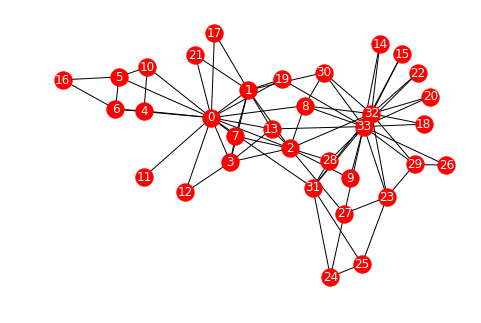

In [3]:
## your code here
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


G = nx.karate_club_graph()
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True, font_color="white")


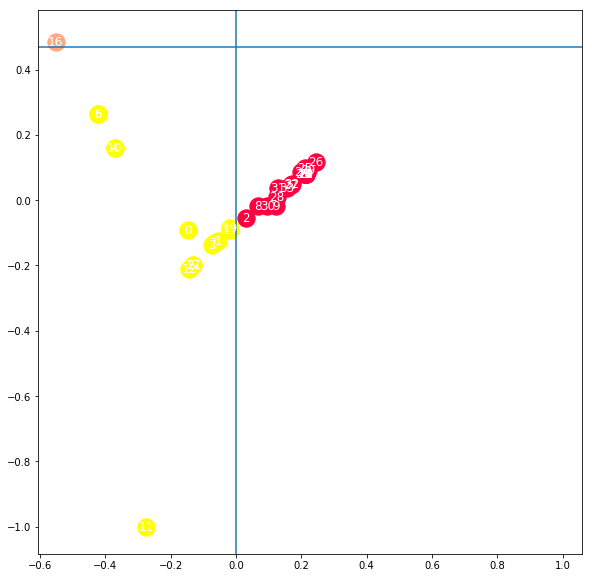

In [4]:
part =  defaultdict(list)
e = nx.laplacian_spectrum(G)

plt.figure(figsize=(10,10))
pos = nx.spectral_layout(G)
for n in G.nodes():
    #Community identification
    if pos[n][0] < e[0] and pos[n][1] < e[1]:
        nx.draw_networkx_nodes(G, {n:pos[n]}, [n], node_color = (1,1,0))
        part[0].append(n)

        
    elif pos[n][0] > e[0] and pos[n][1] < e[1]:
        nx.draw_networkx_nodes(G, {n:pos[n]}, [n], node_color = (1,0,0.25))
        part[1].append(n)

        
    elif pos[n][0] < e[0] and pos[n][1] > e[1]:
        nx.draw_networkx_nodes(G, {n:pos[n]}, [n], node_color = (1,0.67,0.5))
        part[2].append(n)
        
    elif pos[n][0] > e[0] and pos[n][1] > e[1]:
        nx.draw_networkx_nodes(G, {n:pos[n]}, [n], node_color = (0.4,0.2,1))
        part[3].append(n)


nx.draw_networkx_labels(G,pos=pos, font_color="white")
plt.axis('square')
plt.axvline(x=e[0], ymin=0, ymax=1)
plt.axhline(y=e[1], xmin=0, xmax=1)
plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.show()

In [5]:
print(dict(sorted(part.items())))

{0: [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 17, 19, 21], 1: [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], 2: [16]}


## 2. Hierarchical clustering

Create the similarity matrix for the Karate Club graph using Ravasz algorithm 
$$
x_{ij} = \frac{J(i,j)}{min(k_i,k_j)}
$$
Plot the matrix using a heatmap

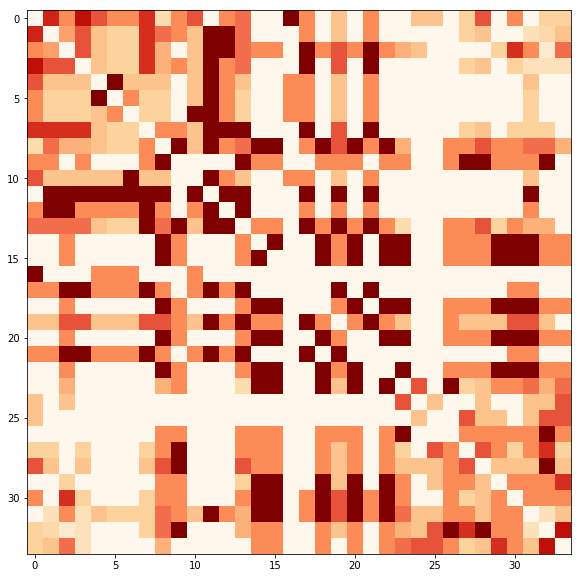

In [6]:
sim_mat = np.zeros((len(G),len(G))) 
plt.figure(figsize=(10,10))
for i in G.nodes():
    for j in G.nodes:
        if i == j:
            sim_mat[i][j] = 0
        else:
            lst1 = G.neighbors(i)
            lst2 = G.neighbors(j)
            common_neig = list(set(lst1) & set(lst2))
            min_k = min(G.degree[i], G.degree[j])
            sim_mat[i][j] = len(common_neig)/min_k

plt.imshow(sim_mat, cmap = plt.cm.OrRd)


Divisive Method: The Girvan-Newman Algorithm

In [7]:
from networkx.algorithms.community.centrality import girvan_newman

comp = girvan_newman(G)
membership = tuple(c for c in next(comp))

partition = defaultdict(list)
c = 0
for p in membership:
    for node in p:
        partition[c].append(node)
    c += 1

gn_partition = [k for n in G.nodes() for k,v in partition.items() if n in v]

Use the Girvan-Newman method available in networkx to obtain the communities for the Karate Club graph. Plot the graph using colors or shapes to identify each communities

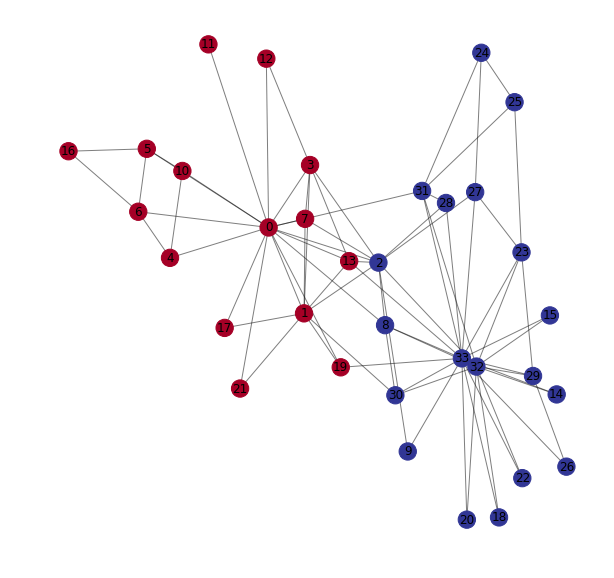

In [8]:
#your code here
pos = nx.spring_layout(G)
plt.figure(figsize=(10,10))
plt.axis('off')

nx.draw_networkx_nodes(G, pos, cmap=plt.cm.RdYlBu, node_color=gn_partition)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.show()

Print the list of nodes in each community and compare it with the results of the spectral analysis. Are there differences?

In [9]:
partition

defaultdict(list,
            {0: [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
             1: [2,
              8,
              9,
              14,
              15,
              18,
              20,
              22,
              23,
              24,
              25,
              26,
              27,
              28,
              29,
              30,
              31,
              32,
              33]})

The only difference is that before in the spectral analysis, node 11 was located in a third community by its own and now with the Girvan-Newman method it is located in the first community.

## 3. Hierarchical clustering
Repeat the analysis with the modularity values obtained by the Lovain method (available in networkx). Plot the results obtained with all the methods and compare them. Recomendation: keep the same positions on the different graphs

In [4]:
#your code here
from community import community_louvain
lovain_partition = community_louvain.best_partition(G)

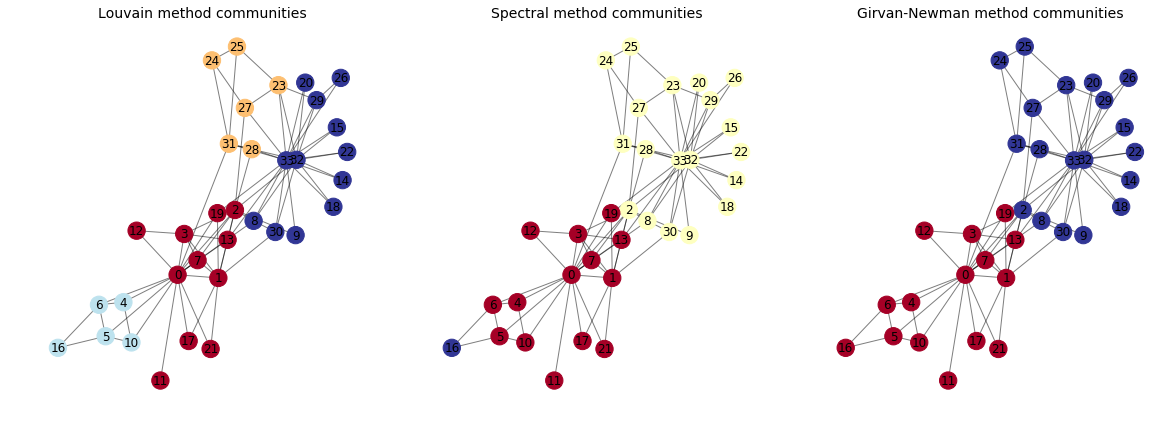

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))


pos = nx.spring_layout(G)

ax1.set_axis_off()
ax1.set_title('Louvain method communities', fontsize=14)
nx.draw_networkx_nodes(G, pos, cmap=plt.cm.RdYlBu, node_color=list(lovain_partition.values()), ax = ax1)
nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax1)
nx.draw_networkx_labels(G, pos, ax=ax1)



spectral_partitions = [k for n in G.nodes() for k,v in part.items() if n in v]
ax2.set_axis_off()
ax2.set_title('Spectral method communities', fontsize=14)
nx.draw_networkx_nodes(G, pos, cmap=plt.cm.RdYlBu, node_color=spectral_partitions, ax = ax2)
nx.draw_networkx_edges(G, pos, alpha=0.5, ax = ax2)
nx.draw_networkx_labels(G, pos, ax = ax2)


ax3.set_axis_off()
ax3.set_title('Girvan-Newman method communities', fontsize=14)
nx.draw_networkx_nodes(G, pos, cmap=plt.cm.RdYlBu, node_color=gn_partition, ax = ax3)
nx.draw_networkx_edges(G, pos, alpha=0.5, ax = ax3)
nx.draw_networkx_labels(G, pos, ax = ax3)

plt.show()

## 4. Deliverable
Choose one of the networks that corresponds to one of the books of Game of Thrones and analyze the network. Study the degree distribution, the centrality measures (degree, betweenness, closeness and pagerank) and include a community analysis.

Describe the results: Which group represent each comunity? Who are the most relevant characters of these communities?

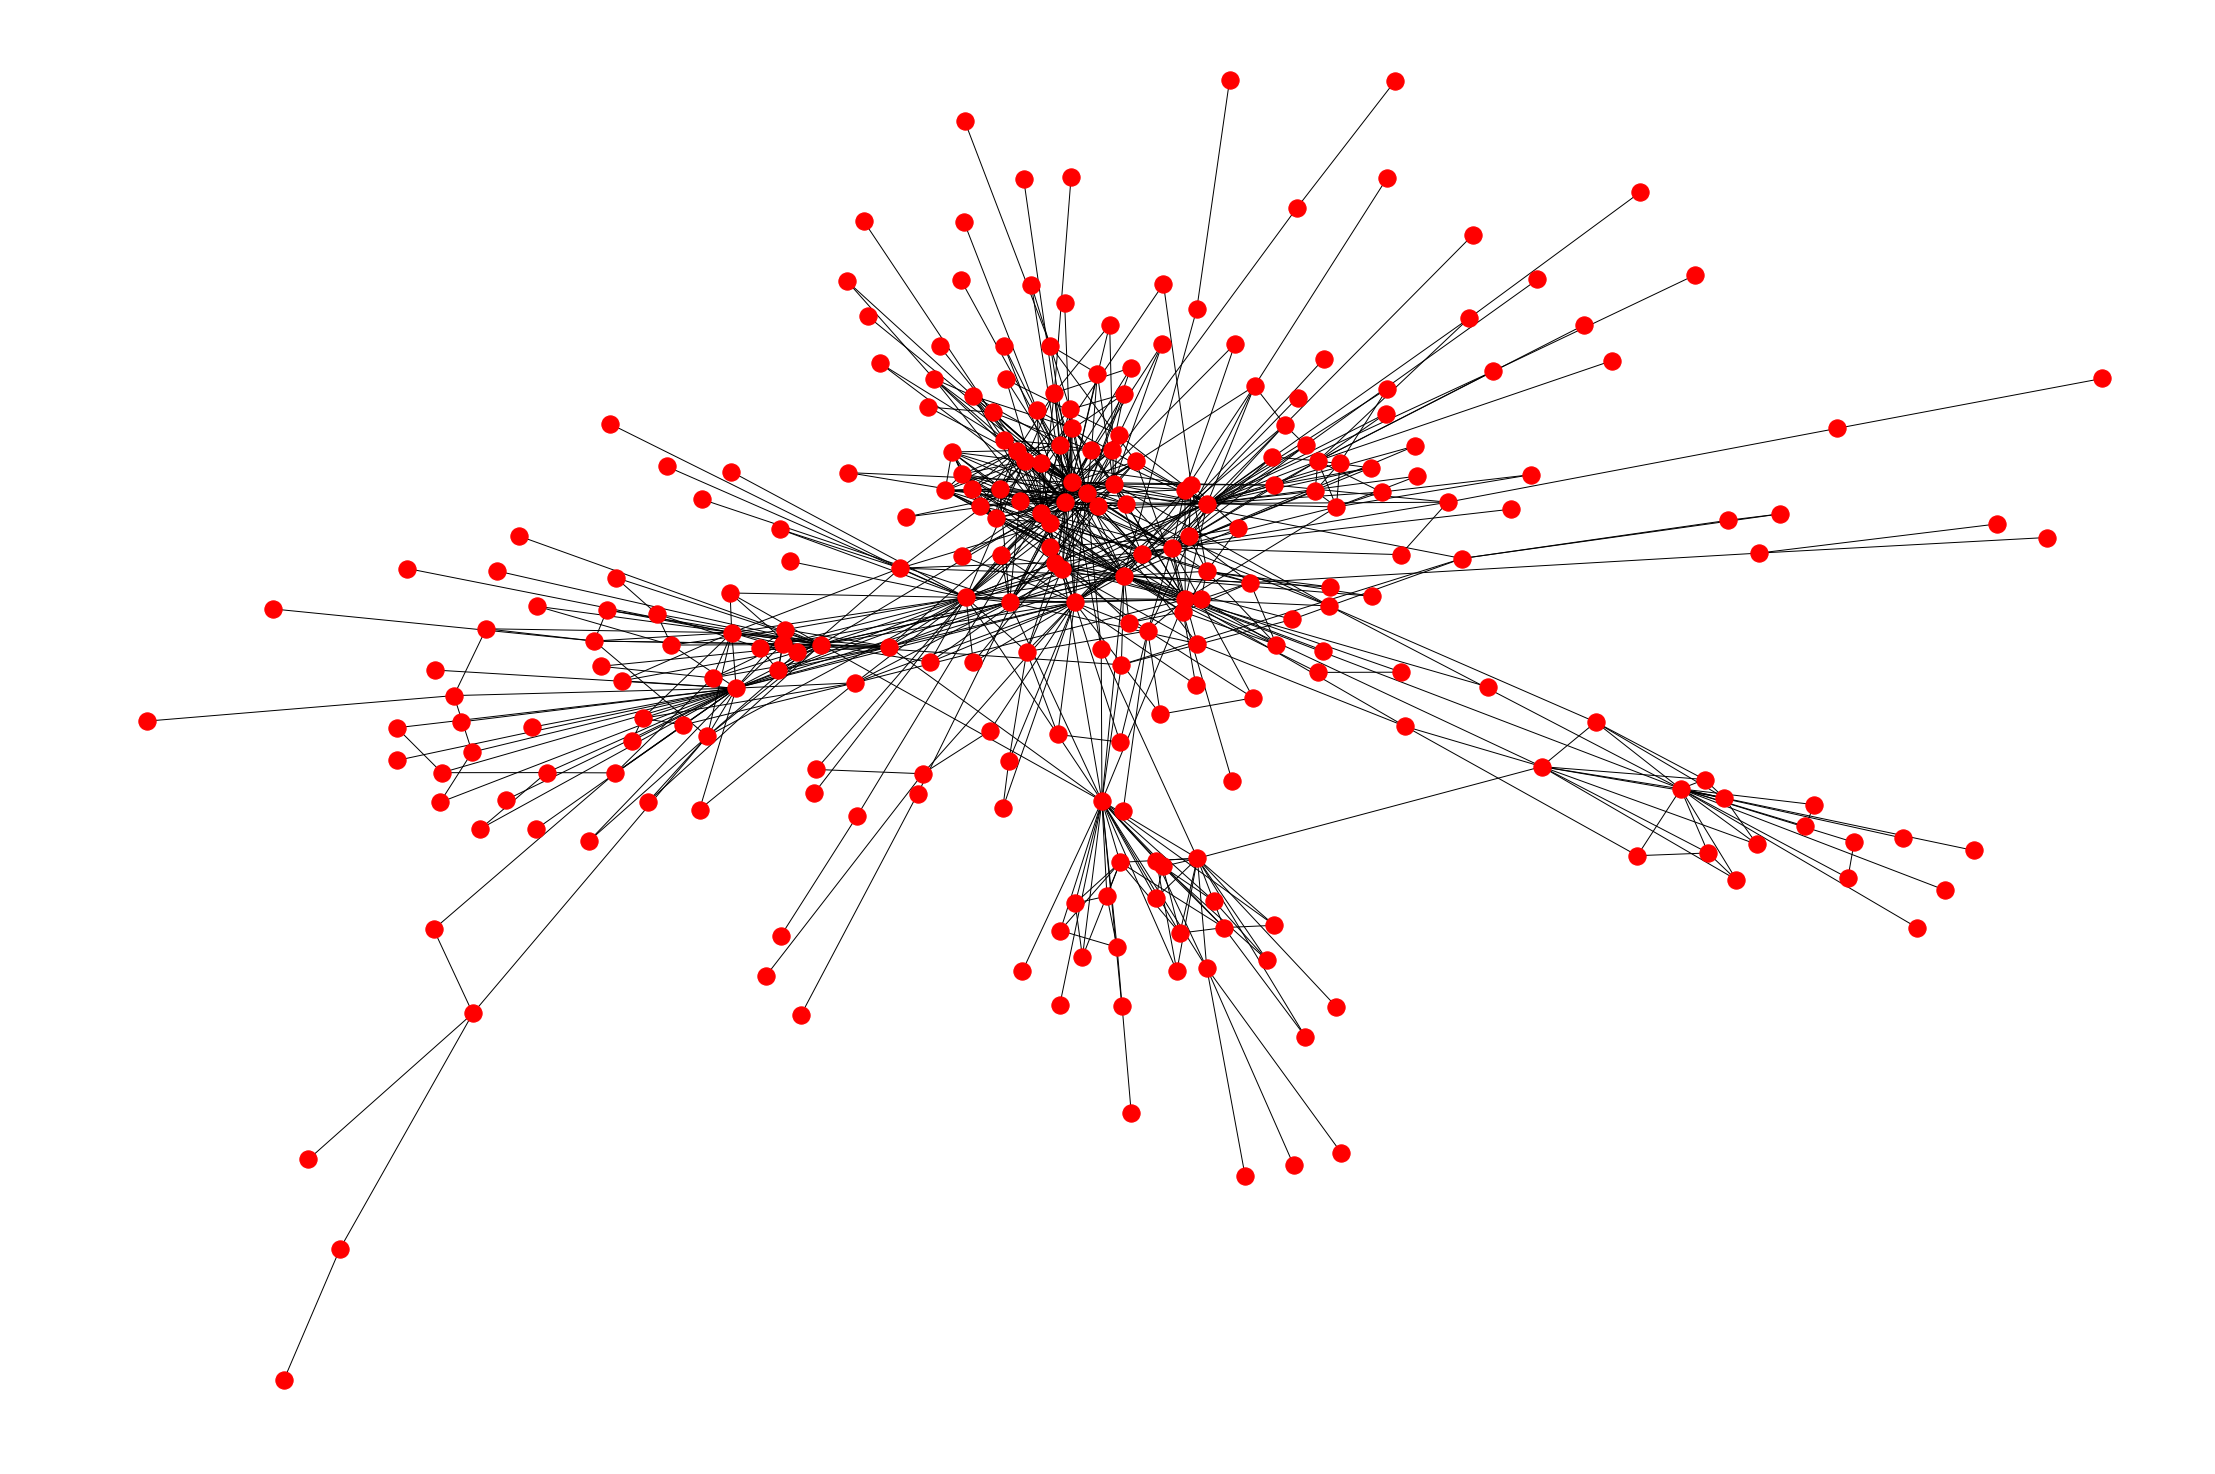

In [24]:
df = pd.read_csv('C:\\Users\\Jose Giner\\OneDrive\\Escritorio\\SNA\\session-7\\got\\book2.csv') #Book 2

G_gt = nx.from_pandas_edgelist(df, 'Source', 'Target', 'weight')
pos = nx.spring_layout(G_gt)
plt.axes([0.1,0.1,5,5])

nx.draw(G_gt,pos)
#nx.draw_networkx_labels(G_gt, pos, font_size=20, font_color='b', font_family='sans-serif')
plt.show()

Basic network analysis

In [7]:
n = len(G_gt)
m = len(G_gt.edges())

degrees = [G_gt.degree(node) for node in G_gt]

kmin = min(degrees)
kmax = max(degrees)

print('Number of nodes: {}'.format(n))
print('Number of edges: {}'.format(m))
print("Average degree: ", round(2*m/n,3))

print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)
print("Connected components: ", nx.number_connected_components(G_gt))

Number of nodes: 259
Number of edges: 775
Average degree:  5.985
Minimum degree:  1
Maximum degree:  53
Connected components:  1


Degree distribution

Text(0.5,0,'Degree')

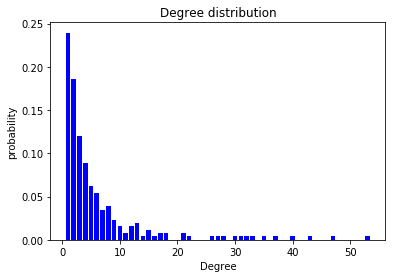

In [9]:
import collections

sucesion_grados = sorted([d for n, d in G_gt.degree()], reverse=False)  
n=len(G_gt)

contamos_grados = collections.Counter(sucesion_grados) 
grados, frecuencia = zip(*contamos_grados.items())

probabilidad=[i * (1/n) for i in frecuencia]  

    
plt.bar(grados, probabilidad, width=0.80, color='b')

plt.title("Degree distribution")
plt.ylabel("probability")
plt.xlabel("Degree")

Looking at the degree distribution, a power law behaviour is seen as many characters in the network have few connections to other characters and few characters obtain many connections.  The highest number of connections is one character that has 53 connections to other characters.

### Centrality measures
Degree centrality

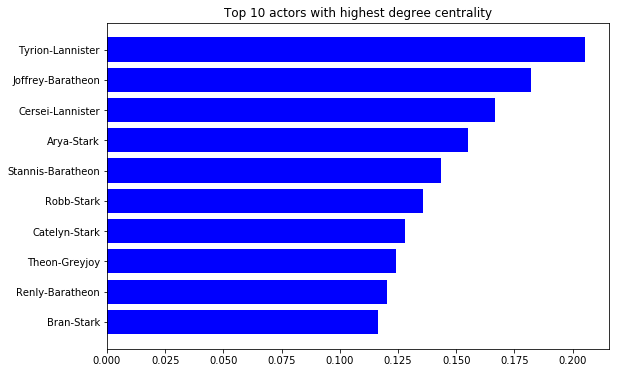

In [22]:
dc = nx.degree_centrality(G_gt)
dc = dict(sorted(dc.items(), key=lambda item: item[1], reverse = True))
top10_dc = {k: dc[k] for k in list(dc)[:10]}

names = list(top10_dc.keys())
values = list(top10_dc.values())

y_pos = np.arange(len(names))

plt.figure(figsize = (9,6))
plt.barh(y_pos, values, color = 'b')
plt.yticks(y_pos, names)
plt.title('Top 10 actors with highest degree centrality')
plt.gca().invert_yaxis()
plt.show()


Betweenness centrality

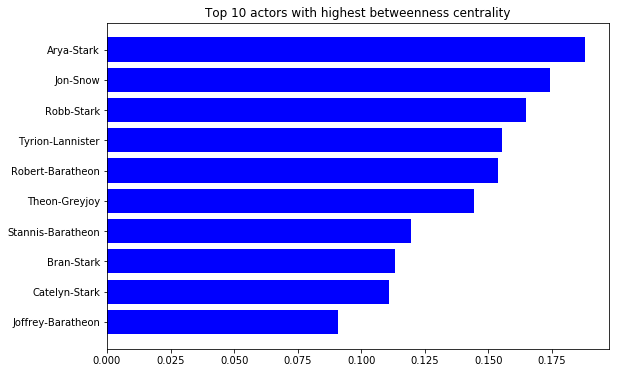

In [23]:
bc = nx.betweenness_centrality(G_gt)
bc = dict(sorted(bc.items(), key=lambda item: item[1], reverse = True))
top10_bc = {k: bc[k] for k in list(bc)[:10]}

names = list(top10_bc.keys())
values = list(top10_bc.values())

y_pos = np.arange(len(names))

plt.figure(figsize = (9,6))
plt.barh(y_pos, values, color = 'b')
plt.yticks(y_pos, names)
plt.title('Top 10 actors with highest betweenness centrality')
plt.gca().invert_yaxis()
plt.show()


Closeness centrality

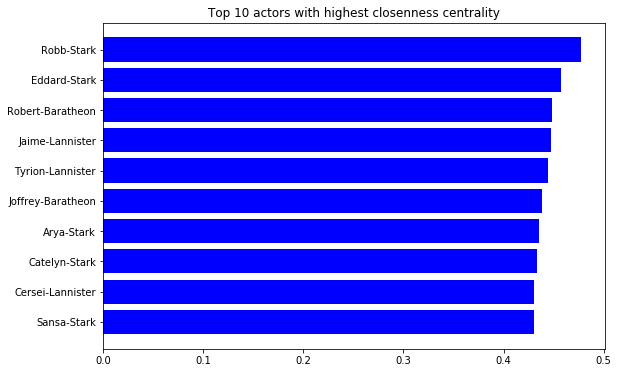

In [24]:
cc = nx.closeness_centrality(G_gt)
cc = dict(sorted(cc.items(), key=lambda item: item[1], reverse = True))
top10_cc = {k: cc[k] for k in list(cc)[:10]}

names = list(top10_cc.keys())
values = list(top10_cc.values())

y_pos = np.arange(len(names))

plt.figure(figsize = (9,6))
plt.barh(y_pos, values, color = 'b')
plt.yticks(y_pos, names)
plt.title('Top 10 actors with highest closenness centrality')
plt.gca().invert_yaxis()
plt.show()

PageRank centrality

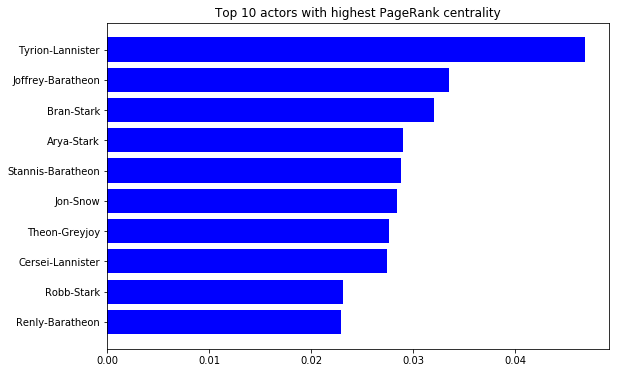

In [26]:
pageRank = nx.pagerank(G_gt)

pageRank = dict(sorted(pageRank.items(), key=lambda item: item[1], reverse = True))
top10_pr = {k: pageRank[k] for k in list(pageRank)[:10]}

names = list(top10_pr.keys())
values = list(top10_pr.values())

y_pos = np.arange(len(names))

plt.figure(figsize = (9,6))
plt.barh(y_pos, values, color = 'b')
plt.yticks(y_pos, names)
plt.title('Top 10 actors with highest PageRank centrality')
plt.gca().invert_yaxis()
plt.show()

We can see in some occasions that the same characters appears in different top 10 lists, indicating that these characters are important in this specific book. For instance, Tyrion and Cersei Lannister, Joffrey Baratheon, Arya and Robb Stark. 

### Community analysis

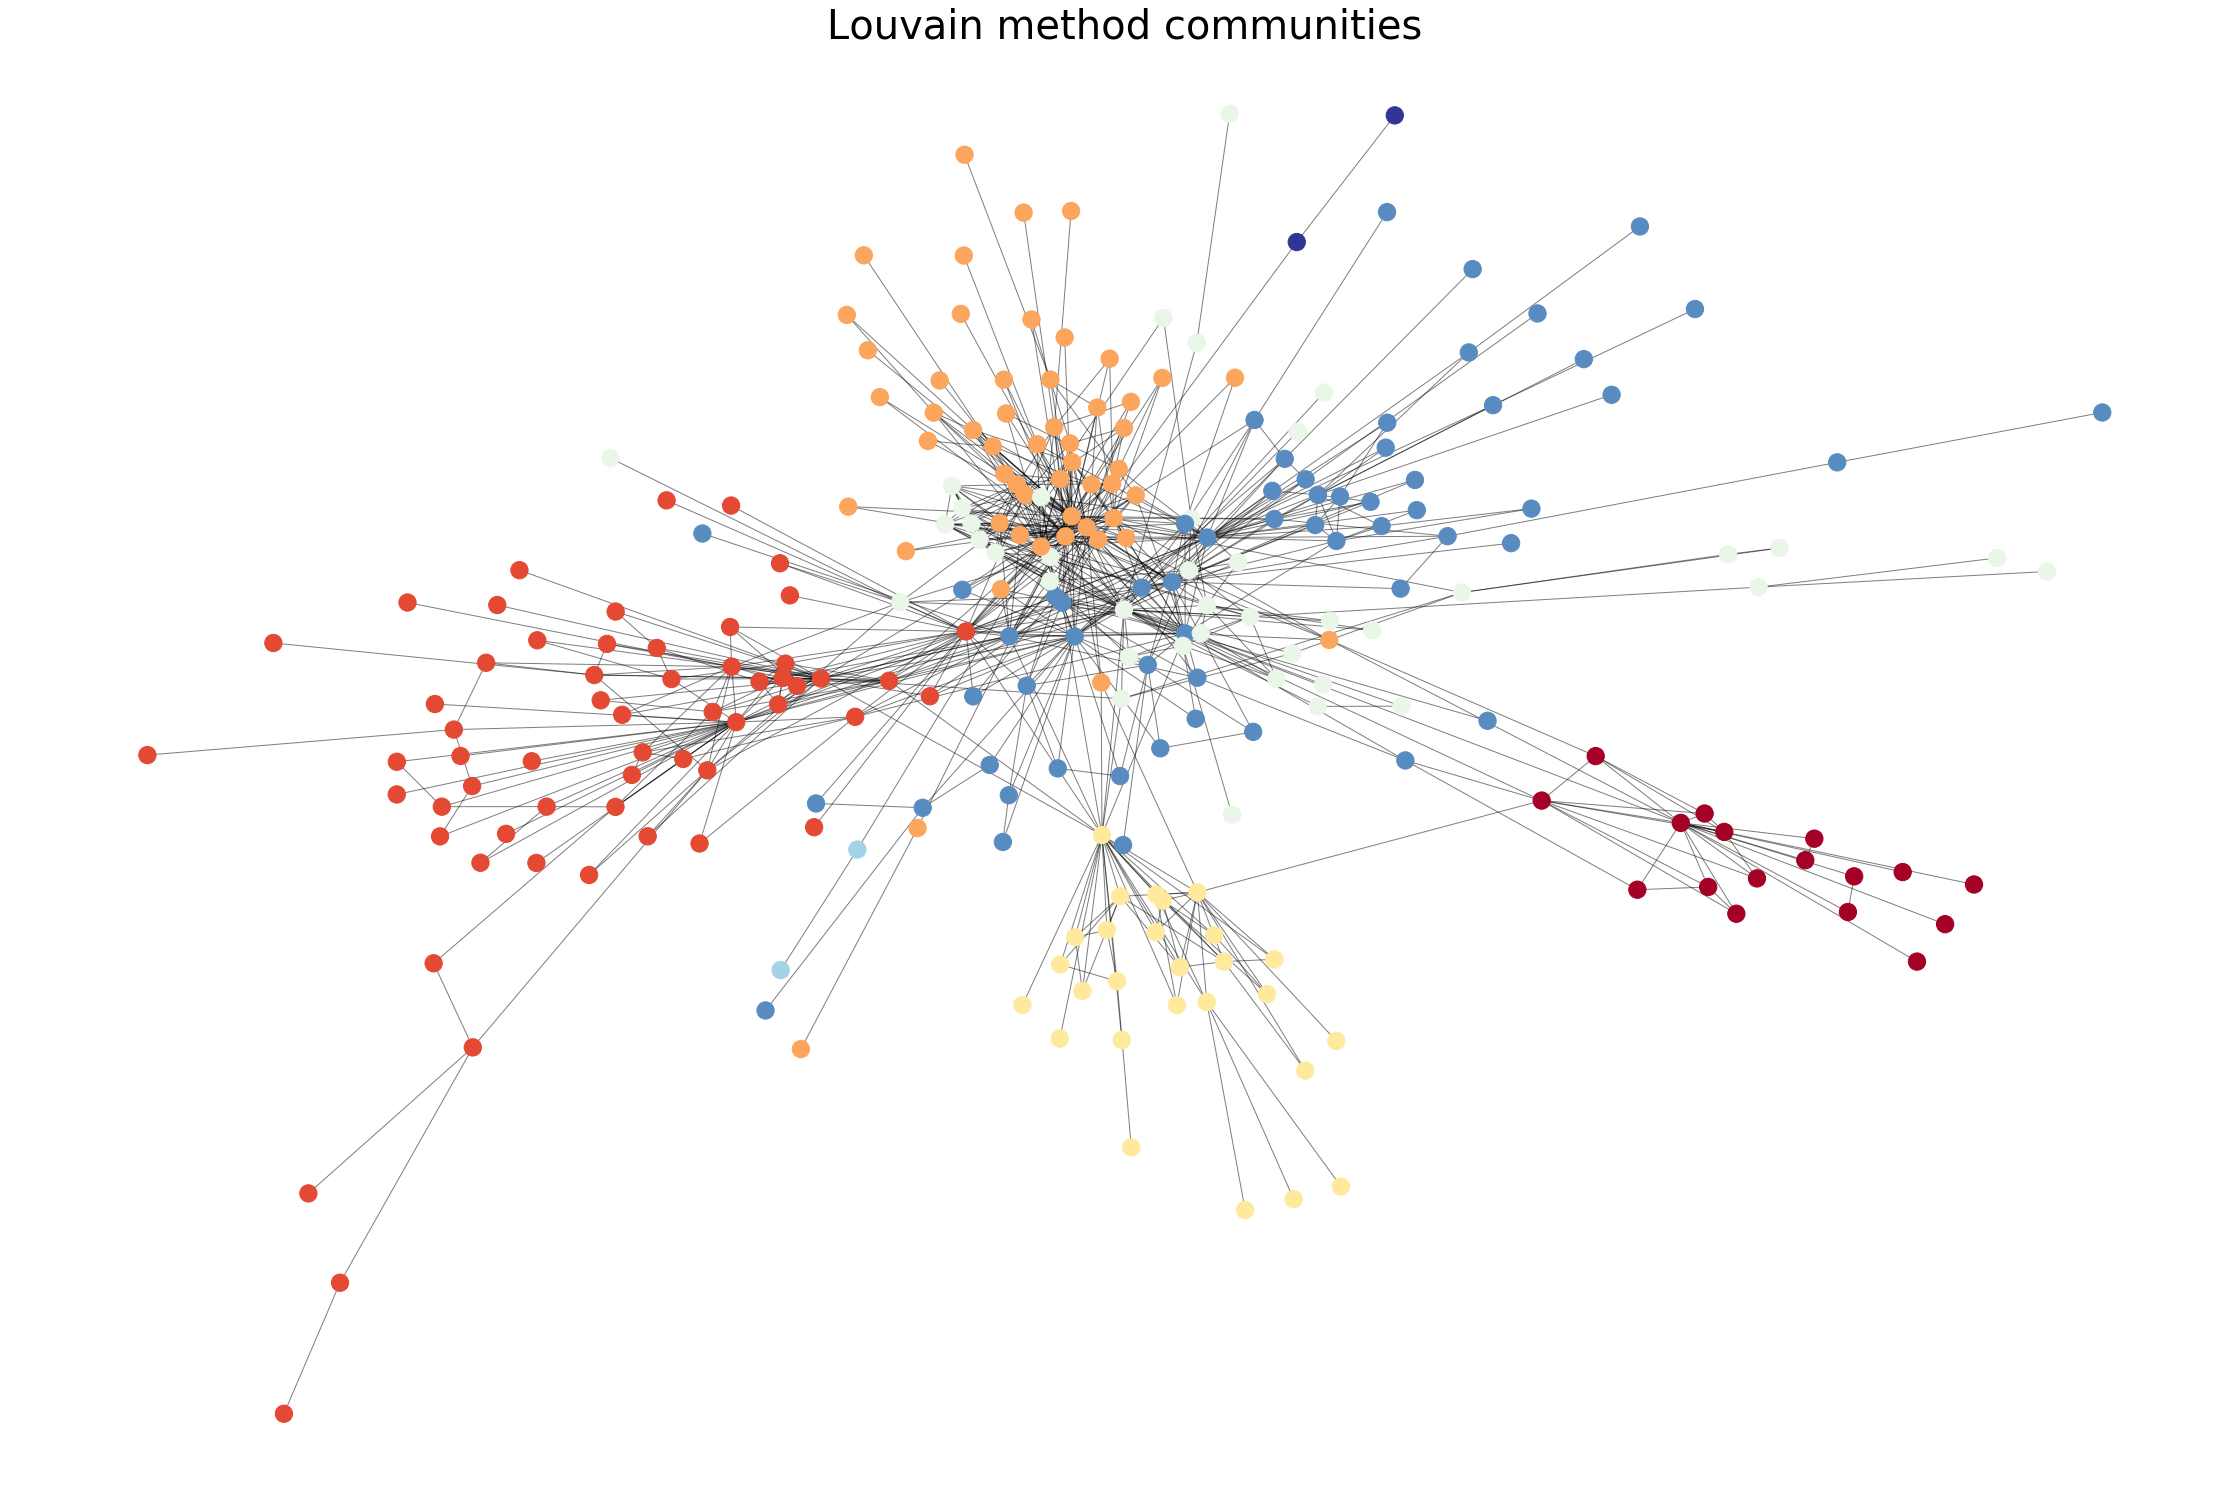

In [29]:
#Louvain method for community detection
louvain_gt = community_louvain.best_partition(G_gt)

plt.axes([0.1,0.1,5,5])
plt.axis('off')
plt.title('Louvain method communities', fontsize=40)
nx.draw_networkx_nodes(G_gt, pos, cmap=plt.cm.RdYlBu, node_color=list(louvain_gt.values()))
nx.draw_networkx_edges(G_gt, pos, alpha=0.5)
#nx.draw_networkx_labels(G_gt, pos, font_size = 25, alpha=0.5)
plt.show()

Modularity value

In [28]:
import community

modularity2 = community.modularity(louvain_gt, G_gt, weight='weight')
print("The modularity Q is {}".format(round(modularity2,3)))

The modularity Q is 0.608


Knowing the actors that form each community

In [18]:
louvain_partition = defaultdict(list)

for k,v in louvain_gt.items():
    louvain_partition[v].append(k)
    
for k in sorted(louvain_partition):
    print("Community {}:\n{}\n".format(k+1,louvain_partition[k]))

Community 1:
['Tyrion-Lannister', 'Jaime-Lannister', 'Alayaya', 'Dancy', 'Allar-Deem', 'Janos-Slynt', 'Alliser-Thorne', 'Joffrey-Baratheon', 'Cersei-Lannister', 'Ilyn-Payne', 'Meryn-Trant', 'Sandor-Clegane', 'Aron-Santagar', 'Sansa-Stark', 'Arys-Oakheart', 'Myrcella-Baratheon', 'Ballabar', 'Podrick-Payne', 'Balon-Swann', 'Mandon-Moore', 'Osmund-Kettleblack', 'Varys', 'Boros-Blount', 'Gyles-Rosby', 'Tanda-Stokeworth', 'Tommen-Baratheon', 'Bronn', 'Jacelyn-Bywater', 'Timett', 'Cleos-Frey', 'Lancel-Lannister', 'Osfryd-Kettleblack', 'Osney-Kettleblack', 'Petyr-Baelish', 'Preston-Greenfield', 'Pycelle', 'Shae', 'Vylarr', 'Chataya', 'Chella', 'Dolf', 'Shagga', 'Dontos-Hollard', 'Moon-Boy', 'Doran-Martell', 'Lollys-Stokeworth', 'Hallyne', 'High-Septon-(fat_one)', 'High-Septon-(Tyrions)', 'Tysha', 'Robert-Arryn', 'Trystane-Martell']

Community 2:
['Aeron-Greyjoy', 'Dagmer', 'Theon-Greyjoy', 'Aggar', 'Gariss', 'Gelmarr', 'Gynir', 'Ramsay-Snow', 'Alebelly', 'Bran-Stark', 'Hayhead', 'Jojen-Reed',

Looking at the communities created by the Louvain method in the Game of Thrones Book 2 network, we can see 8 different groups of characters and from the graph, mainly characters inside a community link more to other characters inside that community, than characters outside that community. This is calculated from the modularity Q of 0.6, where a potential partition is observed. Inside the different communities, we can detect the important characters based on the centrality measures for each one: degree centrality, betweenness centrality, closeness centrality and PageRank.

The first 3 communities are the largest ones, where community 1 contains characters from different families including the Lannisters and some Baratheons, community 2 is formed by Greyjoy and some Stark house members, and community 3 has a good amount of characters from Baratheon family. In these set of communities, the most relevant characters based on the centrality scores from before are Tyrion and Cersei Lannister for the first community, Robb and Bran Stark for the second community and Stannis Baratheon for the third community. 

For least populated communities like 4, 5 and 6, we can see some important characters based on centrality scores such as Jon Snow (4) and Arya Stark (5). We can also se that the Targaryen members are similarly distributed through these communities, with the Louvian method failing to detect this group. 

Communities 7 and 8 are only formed by 2 characters, highlighting the Redwyne twins in community 8.


In [ ]:
#your code here